In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Se carga el DataFrame desde el archivo CSV
df_merged = pd.read_csv('C:/Users/Mati Barna/Desktop/Business Case/orders&customer_dataset')

In [4]:
df_merged.head()

,order_id,customer_id,order_status,order_approved_at,order_received_by_local_operator_date,order_delivered_to_customer_date,order_delivery_promise_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP


In [6]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99281 entries, 0 to 99280
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   order_id                               99281 non-null  object
 1   customer_id                            99281 non-null  object
 2   order_status                           99281 non-null  object
 3   order_approved_at                      99281 non-null  object
 4   order_received_by_local_operator_date  97646 non-null  object
 5   order_delivered_to_customer_date       96470 non-null  object
 6   order_delivery_promise_date            99281 non-null  object
 7   customer_zip_code_prefix               99281 non-null  int64 
 8   customer_city                          99281 non-null  object
 9   customer_state                         99281 non-null  object
dtypes: int64(1), object(9)
memory usage: 7.6+ MB


In [7]:
# Convertir las columnas a datetime
df_merged['order_approved_at'] = pd.to_datetime(df_merged['order_approved_at'])
df_merged['order_received_by_local_operator_date'] = pd.to_datetime(df_merged['order_received_by_local_operator_date'])
df_merged['order_delivered_to_customer_date'] = pd.to_datetime(df_merged['order_delivered_to_customer_date'])
df_merged['order_delivery_promise_date'] = pd.to_datetime(df_merged['order_delivery_promise_date'])

# Verificar la conversión
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99281 entries, 0 to 99280
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   order_id                               99281 non-null  object        
 1   customer_id                            99281 non-null  object        
 2   order_status                           99281 non-null  object        
 3   order_approved_at                      99281 non-null  datetime64[ns]
 4   order_received_by_local_operator_date  97646 non-null  datetime64[ns]
 5   order_delivered_to_customer_date       96470 non-null  datetime64[ns]
 6   order_delivery_promise_date            99281 non-null  datetime64[ns]
 7   customer_zip_code_prefix               99281 non-null  int64         
 8   customer_city                          99281 non-null  object        
 9   customer_state                         99281 non-null  object

1. What is the average delivery time for all orders?


In [11]:

# Calcular la diferencia en días y horas entre 'order_delivered_to_customer_date' y 'order_approved_at'
df_merged['delivery_time'] = df_merged['order_delivered_to_customer_date'] - df_merged['order_approved_at']

# Calcular el tiempo de entrega promedio
mean_delivery_time = df_merged['delivery_time'].mean()

# Extraer días y horas del promedio
mean_days = mean_delivery_time.days
mean_hours = mean_delivery_time.seconds // 3600
mean_minutes = (mean_delivery_time.seconds % 3600) // 60

print(f"El tiempo de entrega promedio para todos los pedidos es de {mean_days} días, {mean_hours} horas y {mean_minutes} minutos.")

El tiempo de entrega promedio para todos los pedidos es de 12 días, 3 horas y 7 minutos.


2. Calculate the 75th and 90th percentiles of the delivery time and interpret the results.
Do you think it's relevant to include percentiles along with the average in this analysis?
Why or why not?

In [13]:
# Calcular el percentil 75 y 90 del tiempo de entrega
percentile_75 = df_merged['delivery_time'].quantile(0.75)
percentile_90 = df_merged['delivery_time'].quantile(0.90)

# Extraer días y horas del percentil 75
percentile_75_days = percentile_75.days
percentile_75_hours = percentile_75.seconds // 3600
percentile_75_minutes = (percentile_75.seconds % 3600) // 60

# Extraer días y horas del percentil 90
percentile_90_days = percentile_90.days
percentile_90_hours = percentile_90.seconds // 3600
percentile_90_minutes = (percentile_90.seconds % 3600) // 60

print(f"El percentil 75 del tiempo de entrega es de {percentile_75_days} días, {percentile_75_hours} horas y {percentile_75_minutes} minutos.")
print(f"El percentil 90 del tiempo de entrega es de {percentile_90_days} días, {percentile_90_hours} horas y {percentile_90_minutes} minutos.")

El percentil 75 del tiempo de entrega es de 15 días, 3 horas y 23 minutos.
El percentil 90 del tiempo de entrega es de 22 días, 13 horas y 49 minutos.


3. Propose at least one indicator to measure delivery performance of the orders, given
the promise made to the customer.

In [15]:
# Calcular OTIF
total_delivered_orders = df_merged[df_merged['order_status'] == 'delivered'].shape[0]
on_time_delivered_orders = df_merged[
    (df_merged['order_status'] == 'delivered') &
    (df_merged['order_delivered_to_customer_date'] <= df_merged['order_delivery_promise_date'])
].shape[0]

otif = (on_time_delivered_orders / total_delivered_orders) * 100
print(f"Tasa de Cumplimiento de la Promesa de Entrega (OTIF): {otif:.2f}%")

Tasa de Cumplimiento de la Promesa de Entrega (OTIF): 91.89%


4. Based on the previous point, which are the three states with the best delivery
performance?


In [18]:

# Filtrar los pedidos entregados
delivered_orders = df_merged[df_merged['order_status'] == 'delivered']

# Calcular OTIF para cada estado
state_otif = delivered_orders.groupby('customer_state').apply(
    lambda x: (x['order_delivered_to_customer_date'] <= x['order_delivery_promise_date']).mean()
).reset_index(name='OTIF')

# Ordenar por OTIF en orden descendente
state_otif = state_otif.sort_values(by='OTIF', ascending=False)

# Obtener los tres estados con el mejor desempeño
top_3_states = state_otif.head(3)


top_3_states

C:\Users\Mati Barna\AppData\Local\Temp\ipykernel_2828\4219922888.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_otif = delivered_orders.groupby('customer_state').apply(


,customer_state,OTIF
20,RO,0.971193
0,AC,0.962500
2,AM,0.958621


5. Do you identify any geographic patterns in delivery delays? Are these patterns
consistent over time?

C:\Users\Mati Barna\AppData\Local\Temp\ipykernel_2828\798255341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_delay'] = (delivered_orders['order_delivery_promise_date'] - delivered_orders['order_delivered_to_customer_date']).dt.days


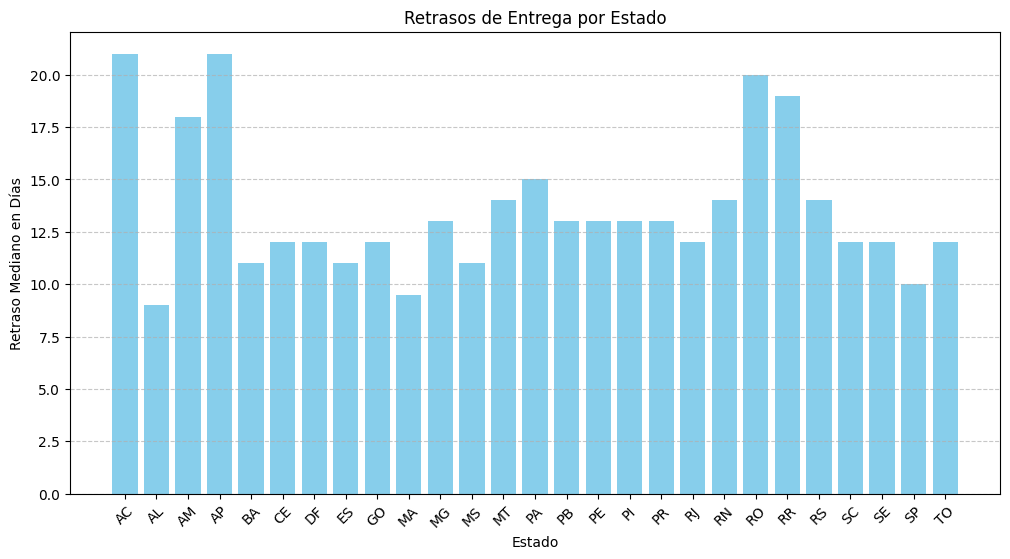

In [24]:
# Calcular los retrasos en la entrega para cada pedido
delivered_orders['delivery_delay'] = (delivered_orders['order_delivery_promise_date'] - delivered_orders['order_delivered_to_customer_date']).dt.days

# Calcular la mediana de los retrasos por estado
state_delivery_delay = delivered_orders.groupby('customer_state')['delivery_delay'].median().reset_index(name='median_delay')

# Visualizar los retrasos geográficos en un mapa

# Graficar los retrasos geográficos
plt.figure(figsize=(12, 6))
plt.bar(state_delivery_delay['customer_state'], state_delivery_delay['median_delay'], color='skyblue')
plt.title('Retrasos de Entrega por Estado')
plt.xlabel('Estado')
plt.ylabel('Retraso Mediano en Días')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Mati Barna\AppData\Local\Temp\ipykernel_2828\3279241740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['quarter'] = delivered_orders['order_delivered_to_customer_date'].dt.to_period('Q')


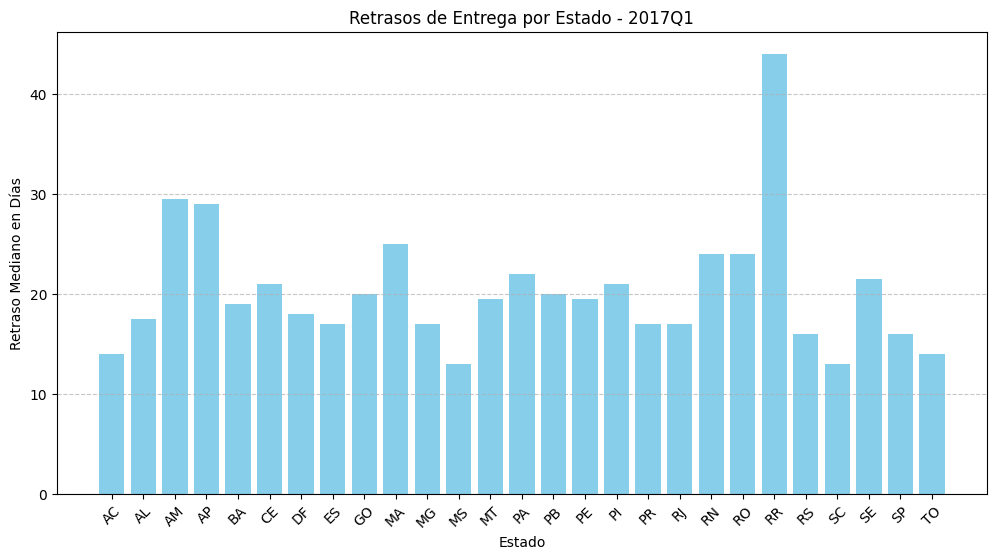

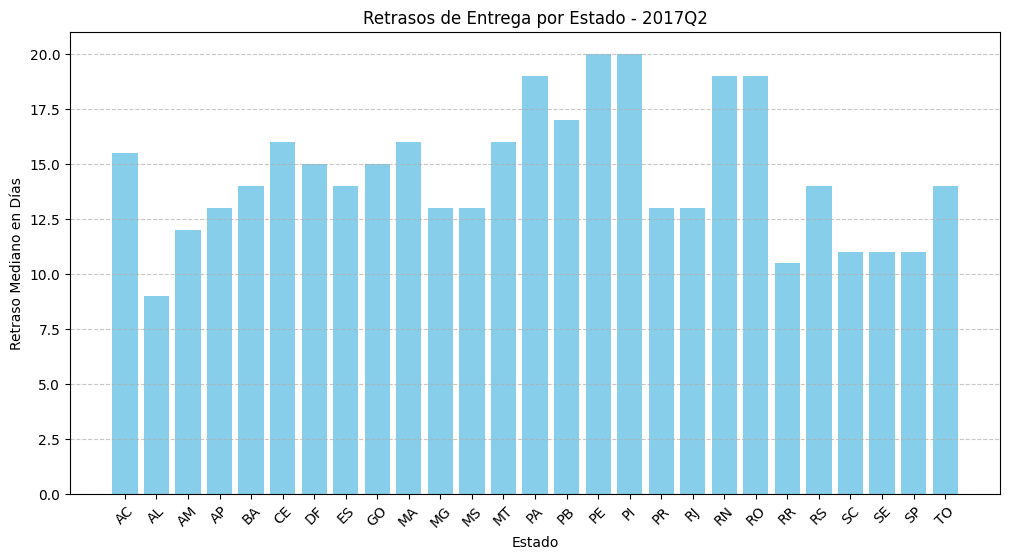

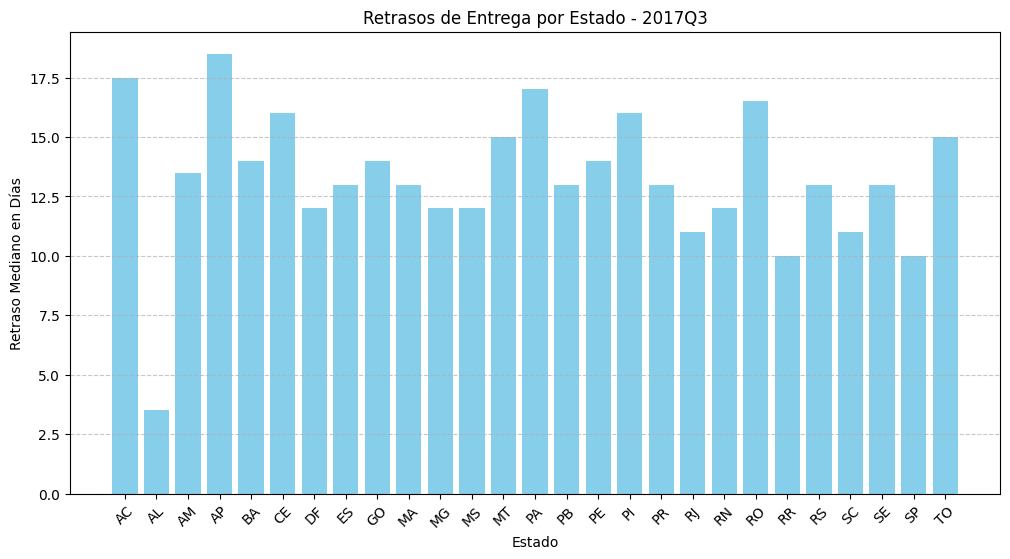

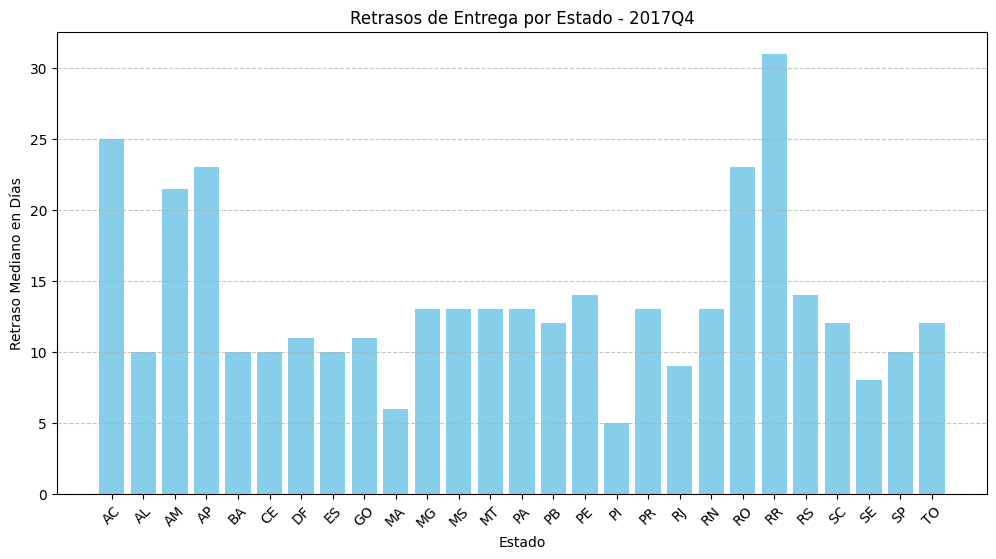

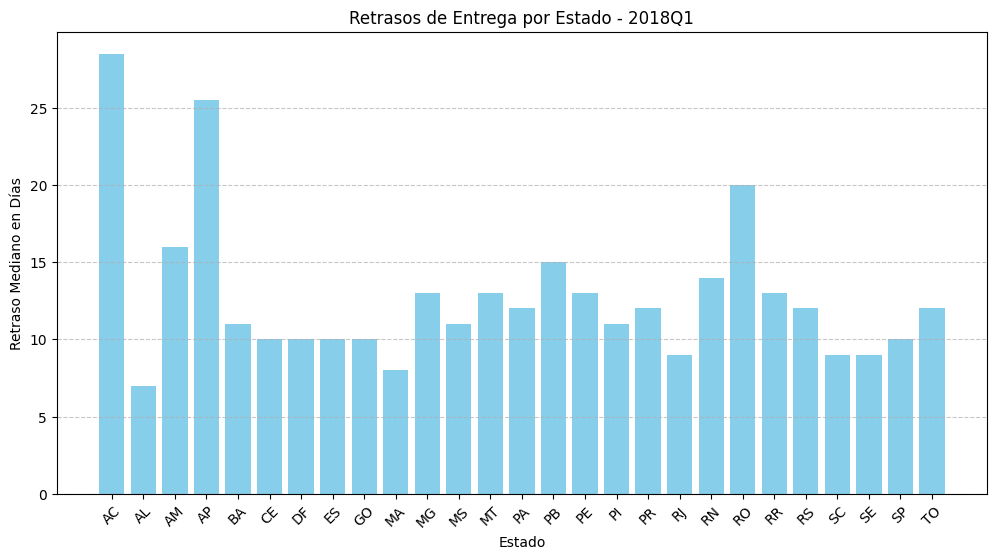

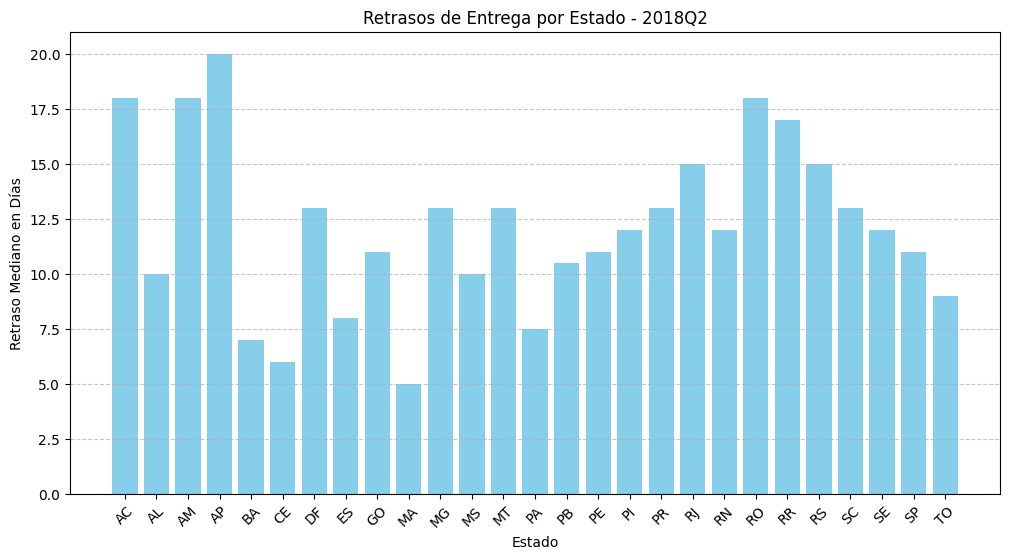

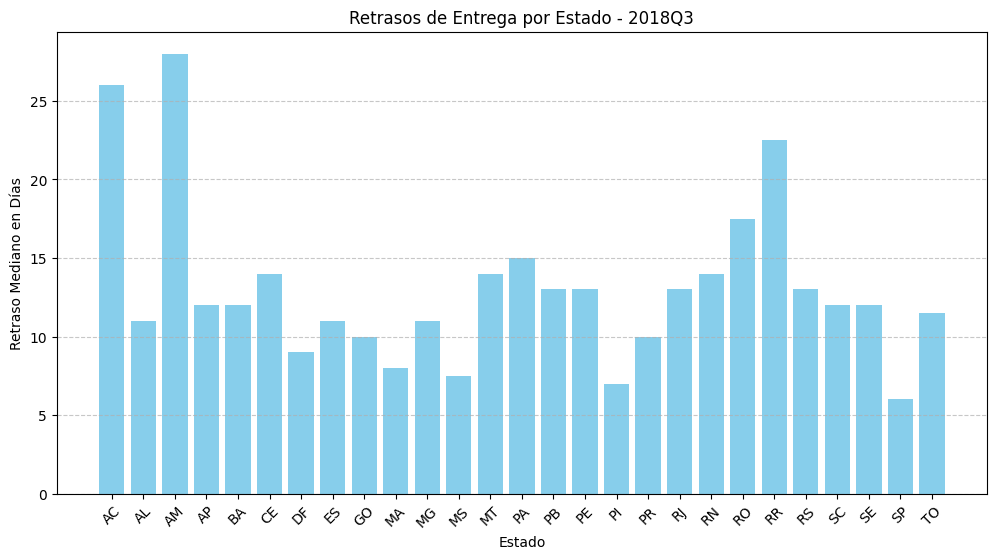

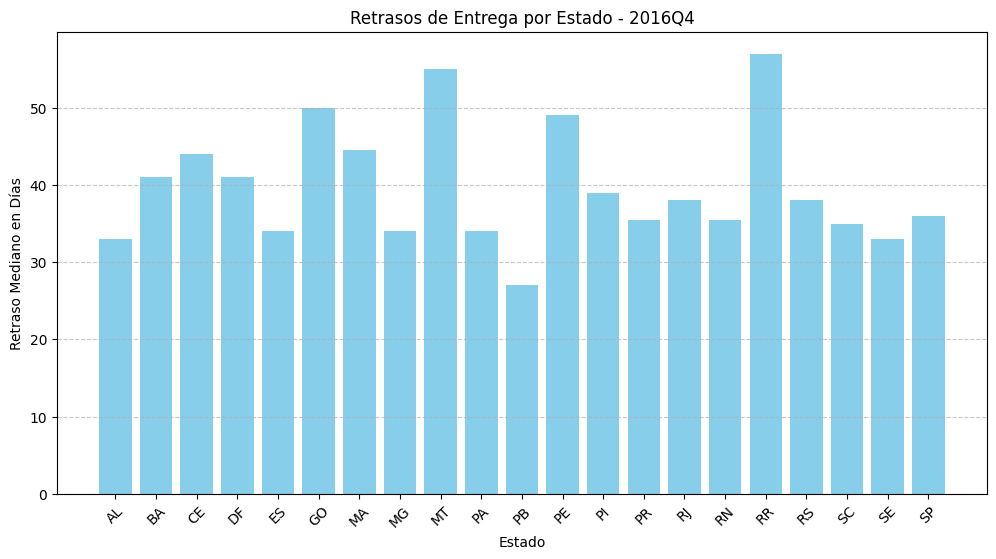

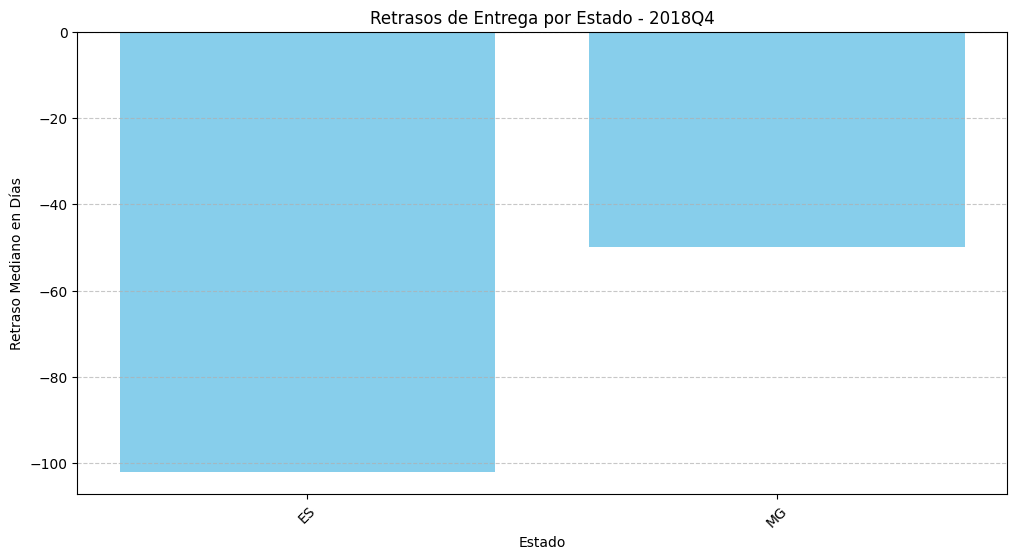

In [25]:
delivered_orders['quarter'] = delivered_orders['order_delivered_to_customer_date'].dt.to_period('Q')
quarterly_state_delivery_delay = delivered_orders.groupby(['customer_state', 'quarter'])['delivery_delay'].median().reset_index(name='median_delay')

# Visualizar los resultados para diferentes trimestres
for quarter in quarterly_state_delivery_delay['quarter'].unique():
    plt.figure(figsize=(12, 6))
    quarter_data = quarterly_state_delivery_delay[quarterly_state_delivery_delay['quarter'] == quarter]
    plt.bar(quarter_data['customer_state'], quarter_data['median_delay'], color='skyblue')
    plt.title(f'Retrasos de Entrega por Estado - {quarter}')
    plt.xlabel('Estado')
    plt.ylabel('Retraso Mediano en Días')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


6. What initiatives do you propose to improve delivery times and performance? Rank
these initiatives according to the priority you would give them for implementation and
justify